In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
food_df = pd.read_excel('Nutrient_Values.xlsx', header=0)
food_df.columns = food_df.iloc[0]
food_df = food_df.iloc[1:]
food_df.head()

,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
1,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0,4.38,...,0.04,0,0.374,0.052,0,0.026,0,0,0,87.5
2,11100000,"Milk, NFS",1004,"Milk, reduced fat",52,3.33,4.83,4.88,0,2.14,...,0.002,0,0.074,0.008,0,0.003,0,0.001,0,88.92
3,11111000,"Milk, whole",1002,"Milk, whole",61,3.27,4.63,4.81,0,3.2,...,0.004,0,0.115,0.013,0,0.004,0.001,0.002,0,88.1
4,11112110,"Milk, reduced fat (2%)",1004,"Milk, reduced fat",50,3.36,4.9,4.89,0,1.9,...,0.002,0,0.061,0.007,0,0.003,0,0.001,0,89.1
5,11112210,"Milk, low fat (1%)",1006,"Milk, lowfat",43,3.38,5.18,4.96,0,0.95,...,0.001,0,0.033,0.004,0,0.001,0,0,0,89.7


In [4]:
print(food_df.columns)

Index(['Food code', 'Main food description', 'WWEIA Category number',
       'WWEIA Category description', 'Energy (kcal)', 'Protein (g)',
       'Carbohydrate (g)', 'Sugars, total\n(g)', 'Fiber, total dietary (g)',
       'Total Fat (g)', 'Fatty acids, total saturated (g)',
       'Fatty acids, total monounsaturated (g)',
       'Fatty acids, total polyunsaturated (g)', 'Cholesterol (mg)',
       'Retinol (mcg)', 'Vitamin A, RAE (mcg_RAE)', 'Carotene, alpha (mcg)',
       'Carotene, beta (mcg)', 'Cryptoxanthin, beta (mcg)', 'Lycopene (mcg)',
       'Lutein + zeaxanthin (mcg)', 'Thiamin (mg)', 'Riboflavin (mg)',
       'Niacin (mg)', 'Vitamin B-6 (mg)', 'Folic acid (mcg)',
       'Folate, food (mcg)', 'Folate, DFE (mcg_DFE)', 'Folate, total (mcg)',
       'Choline, total (mg)', 'Vitamin B-12 (mcg)',
       'Vitamin B-12, added\n(mcg)', 'Vitamin C (mg)',
       'Vitamin D (D2 + D3) (mcg)', 'Vitamin E (alpha-tocopherol) (mg)',
       'Vitamin E, added\n(mg)', 'Vitamin K (phylloquinone) (

In [5]:
column_list = ['WWEIA Category description','Energy (kcal)', 'Protein (g)', 'Carbohydrate (g)', 'Sugars, total\n(g)', 'Fiber, total dietary (g)', 'Total Fat (g)', 'Vitamin D (D2 + D3) (mcg)', 'Calcium (mg)','Iron\n(mg)', 'Sodium (mg)','Potassium (mg)']

food_df_selected = food_df[column_list]
food_df_selected.head()

,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Vitamin D (D2 + D3) (mcg),Calcium (mg),Iron\n(mg),Sodium (mg),Potassium (mg)
1,Human milk,70,1.03,6.89,6.89,0,4.38,0.1,32,0.03,17,51
2,"Milk, reduced fat",52,3.33,4.83,4.88,0,2.14,1.1,125,0,39,156
3,"Milk, whole",61,3.27,4.63,4.81,0,3.2,1.1,123,0,38,150
4,"Milk, reduced fat",50,3.36,4.9,4.89,0,1.9,1.1,126,0,39,159
5,"Milk, lowfat",43,3.38,5.18,4.96,0,0.95,1.1,126,0,39,159


In [6]:
food_df_selected_unique = food_df_selected.drop_duplicates(subset='WWEIA Category description', keep='first')
food_df_selected_unique.head()

,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Vitamin D (D2 + D3) (mcg),Calcium (mg),Iron\n(mg),Sodium (mg),Potassium (mg)
1,Human milk,70,1.03,6.89,6.89,0,4.38,0.1,32,0.03,17,51
2,"Milk, reduced fat",52,3.33,4.83,4.88,0,2.14,1.1,125,0,39,156
3,"Milk, whole",61,3.27,4.63,4.81,0,3.2,1.1,123,0,38,150
5,"Milk, lowfat",43,3.38,5.18,4.96,0,0.95,1.1,126,0,39,159
6,"Milk, nonfat",34,3.43,4.92,5.05,0,0.08,1.1,132,0,41,167


In [7]:
new_columns = ['Food_items','Calories','Proteins', 'Carbohydrates', 'Sugars', 'Fibre', 'Fats','VitaminD', 'Calcium', 'Iron', 'Sodium', 'Potassium']
food_df_selected_unique.columns = new_columns
food_df_selected_unique.tail()

,Food_items,Calories,Proteins,Carbohydrates,Sugars,Fibre,Fats,VitaminD,Calcium,Iron,Sodium,Potassium
5530,Baby water,0,0,0,0,0,0,0,0,0,0,0
5531,Nutritional beverages,101,4.22,17.3,8.44,1.3,1.69,2.5,127,1.9,63,245
5547,Protein and nutritional powders,353,19.9,66.2,65.8,0.4,1.4,0,285,12.82,385,947
5565,Sport and energy drinks,46,0.25,12.08,12.08,0,0.08,0,13,0.02,35,3
5576,Diet sport and energy drinks,5,0,1.38,1.38,0,0,0,0,0,75,0


In [16]:
row_to_update = food_df_selected_unique[food_df_selected_unique['Food_items']=='Not included in a food category']
row_to_update['Food_items'] = 'Grilled Chicken Salad with Honey Mustard Dressing'

food_df_selected_unique[food_df_selected_unique['Food_items']=='Not included in a food category']
food_df_selected_unique[food_df_selected_unique['Food_items']=='Grilled Chicken Salad with Honey Mustard Dressing']

,Food_items,Calories,Proteins,Carbohydrates,Sugars,Fibre,Fats,VitaminD,Calcium,Iron,Sodium,Potassium


In [22]:
# row_index = food_df_selected_unique.loc[food_df_selected_unique['Food_items'] == 'Not included in a food category'].index[0]

# # Set the column indexer to 'Food_items'
# # col_index = food_df_selected_unique.columns.get_loc('Food_items')

# # Set the new value for the 'Food_items' column
# new_value = 'Grilled Chicken Salad with Honey Mustard Dressing'

# food_df_selected_unique.loc[row_index, 'Food_items'] = new_value

# food_df_selected_unique[food_df_selected_unique['Food_items']=='Grilled Chicken Salad with Honey Mustard Dressing']


food_df_selected_unique = food_df_selected_unique[food_df_selected_unique['Food_items'] != 'Not included in a food category']


In [23]:
food_df_selected_unique.to_csv('food_new.csv', index=False)

In [39]:
type(food_df_selected_unique['Calories'])

pandas.core.series.Series

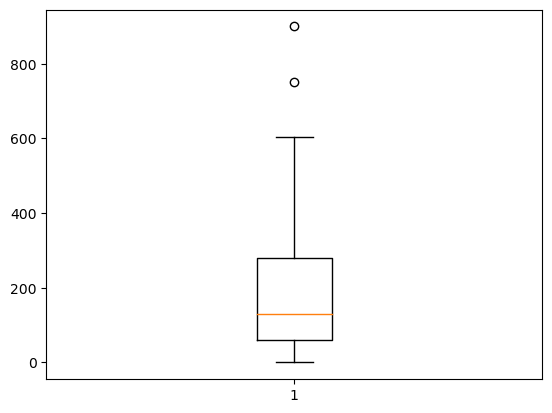

In [54]:
# food_df_selected_unique['Carbohydrates'].value_counts().plot(kind='bar')
plt.boxplot(food_df_selected_unique['Calories'])
plt.show()

In [55]:
q1 = food_df_selected_unique['Calories'].quantile(0.25)
q3 = food_df_selected_unique['Calories'].quantile(0.75)
iqr = q3-q1
q_min = q1-(1.5*iqr)
q_max = q3+(1.5*iqr)

print(q_min,q1, q3,q_max)

-271.0 59.0 279.0 609.0


In [62]:
food_df_selected_unique.iloc[110]

Food_items       Apples
Calories             61
Proteins           0.17
Carbohydrates      14.8
Sugars            12.08
Fibre               2.1
Fats               0.15
VitaminD              0
Calcium               5
Iron               0.03
Sodium                0
Potassium           104
Name: 3952, dtype: object